In [67]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [68]:
import numpy as np
import pandas as pd
import datetime as dt

In [69]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [70]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [71]:
 # reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [72]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [73]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [75]:
#Exploratory Precipitation Analysis
# Find the most recent date in the data set.
latest_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
latest_date

('2017-08-23')

Text(0, 0.5, 'inches')

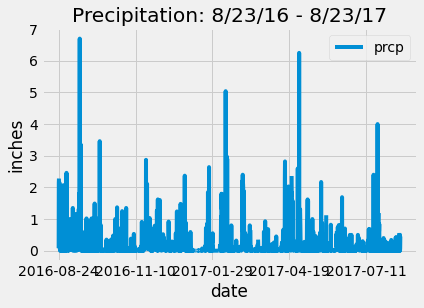

In [76]:
# Find the most recent date in the data set.
latest_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

latest_date = list(np.ravel(latest_date))[0]
latest_date = str(latest_date)
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')

# Starting from the most recent data point in the database. 
latestYear = int(dt.datetime.strftime(latest_date, '%Y'))
latestMonth = int(dt.datetime.strftime(latest_date, '%m'))
latestDay = int(dt.datetime.strftime(latest_date, '%d'))


# Calculate the date one year from the last date in data set.
yearBefore = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rainData = (session.query(Measurement.date, Measurement.prcp)
                    .filter(Measurement.date > yearBefore)
                    .order_by(Measurement.date)
                    .all())

# Save the query results as a Pandas DataFrame and set the index to the date column
rainTable = pd.DataFrame(rainData)
rainTable = rainTable.set_index('date')

# Sort the dataframe by date
rainTable = rainTable.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
rainTable.plot(title="Precipitation: 8/23/16 - 8/23/17")
plt.ylabel('inches')

In [77]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rainTable.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [78]:
#Exploratory Station Analysis
# Design a query to calculate the total number stations in the dataset
StationsCount = session.query(Station).count()
print(f"Station Count:{StationsCount}")

Station Count:9


In [79]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
StationsCount = (session.query(Measurement.station, func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
StationsCount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Station_ID = StationsCount[0][0]

#query for station name
Station_Name = (session.query(Station.name)
                      .filter_by(station = Station_ID))
Station_Name = Station_Name[0][0]
print(f"Most active station is {Station_ID}: {Station_Name}.")

#query for lowest temperature
Lowest_Temp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == stationID)
                     .order_by(Measurement.tobs.asc())
                     .first())
Lowest_Temp = Lowest_Temp[0]
print(f"Lowest temperature recorded is {Lowest_Temp} degrees Farenheit.")

#query for highest temperature
Highest_Temp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())
Highest_Temp = Highest_Temp[0]
print(f"Highest temperature recorded is {Highest_Temp} degrees Farenheit.")


#query for average temperature
Avg_Temp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationID))
Avg_Temp = '{0:.3}'.format(Avg_Temp[0][0])
print(f"The average temperature recorded there is {Avg_Temp} degrees Farenheit.")


Most active station is USC00519281: WAIHEE 837.5, HI US.
Lowest temperature recorded is 54.0 degrees Farenheit.
Highest temperature recorded is 85.0 degrees Farenheit.
The average temperature recorded there is 71.7 degrees Farenheit.


Text(0.5, 0, 'Temperature')

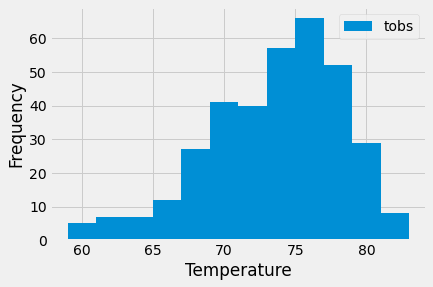

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_Data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > yearBefore)
                   .filter(Measurement.station == Station_ID)
                   .order_by(Measurement.date)
                   .all())

#convert query object to data frame
Temp_Table = pd.DataFrame(Temp_Data)
Temp_Table = Temp_Table.set_index('date')

#sort by date
Temp_Table = Temp_Table.sort_index(ascending=True)

#histogram plot with pandas
Temp_Table.plot(kind='hist', bins=12)
plt.xlabel('Temperature')

In [ ]:
# Close Session
session.close()